<IPython.core.display.Javascript object>


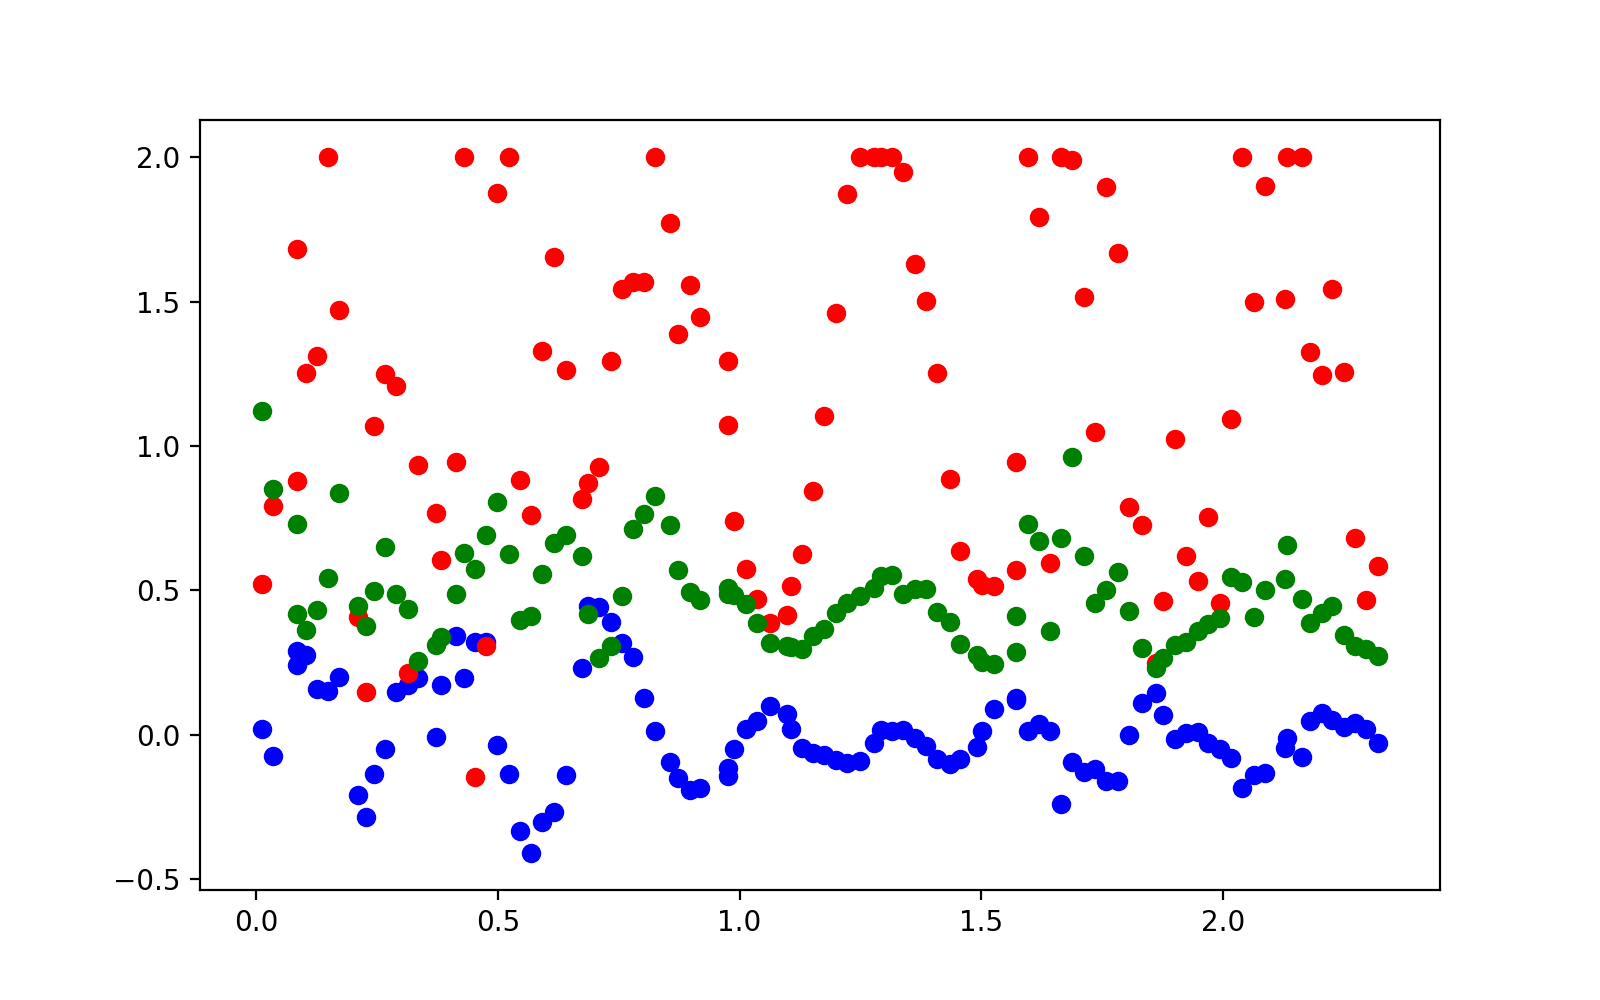

In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import socket
import time
acc_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
acc_socket.bind(("",8086))
time0 = time.time()
def convword(data):
    high = (data[0])
    low = (data[1])
    val = (high << 8) + low
    if (val >= 0x8000):
        val = -((65535 - val) + 1)
    val /= 16384.0
    return val

t= []
acc1, acc2, acc3 = [],[],[]

for i in range(0,100):
    data = acc_socket.recv(40960)
    acc = list(map(convword,[data[0:2],data[2:4],data[4:6]]))
    t.append(time.time()-time0)
    acc1.append(acc[0])
    acc2.append(acc[1])
    acc3.append(acc[2])
    
fig,ax  = plt.subplots(1,figsize=(8,5))
ax.scatter(t,acc1,color="blue")
ax.scatter(t,acc2,color="red")
ax.scatter(t,acc3,color="green")
fig.canvas.draw()